In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [25]:
raw_data = pd.read_csv('Car_Insurance_Claim.csv')
raw_data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [26]:
raw_data.shape

(10000, 19)

## Data preprocessing

In [27]:
#making a copy
df_pp_1 = raw_data.copy()

<AxesSubplot: >

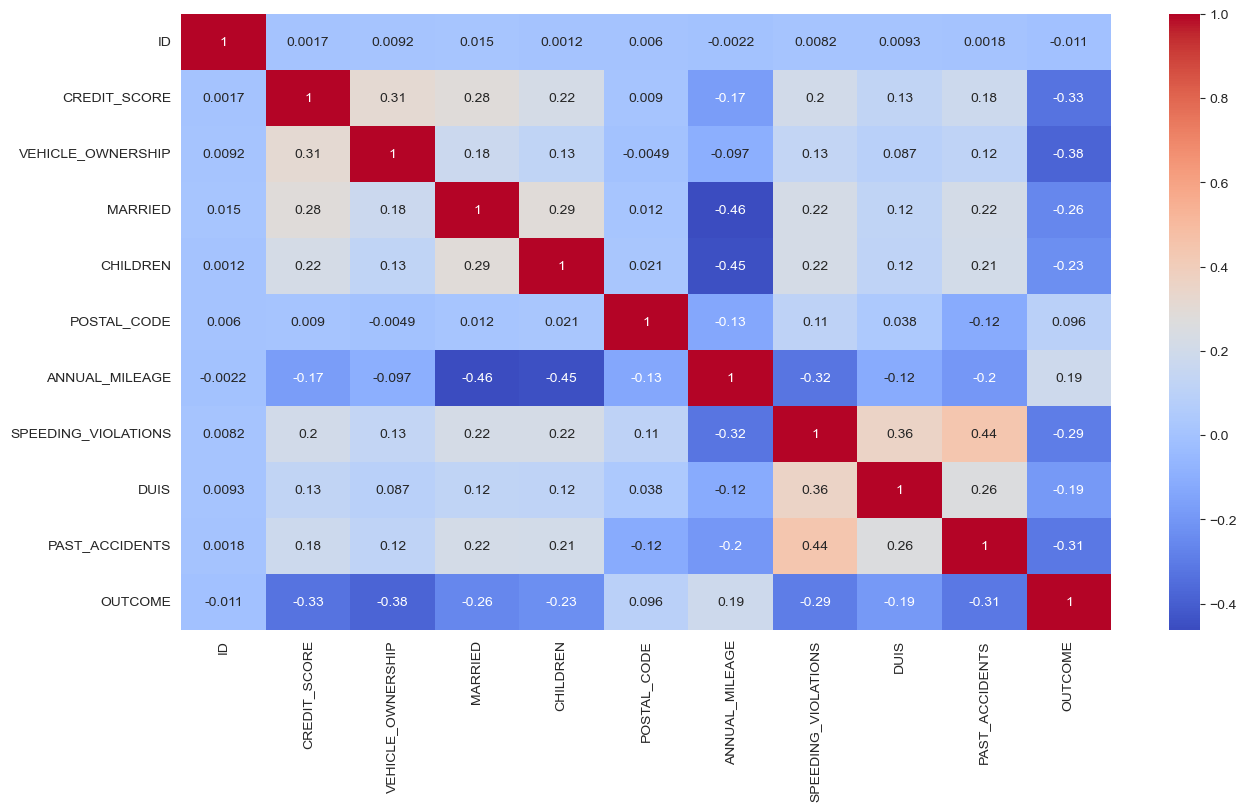

In [28]:
#Checking correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(df_pp_1.corr(), cmap="coolwarm", annot=True, )

In [29]:
#Checking for null values
df_pp_1.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

<AxesSubplot: xlabel='CREDIT_SCORE', ylabel='Count'>

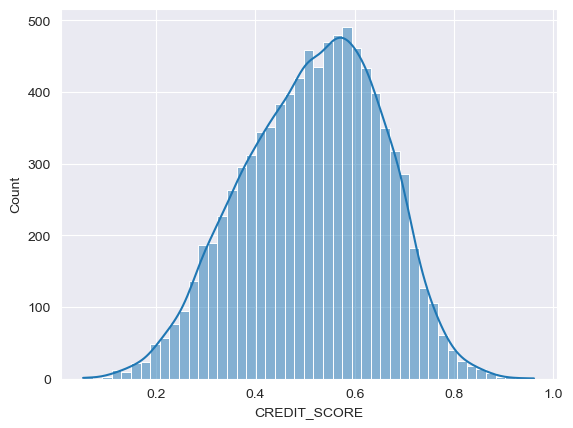

In [30]:
sns.histplot(x=df_pp_1['CREDIT_SCORE'],kde=True)

<AxesSubplot: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

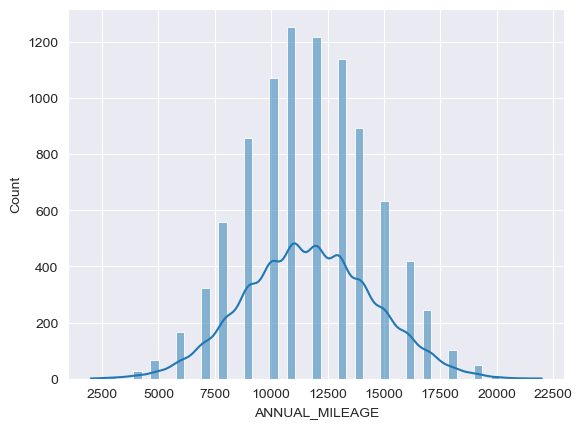

In [31]:
sns.histplot(x=df_pp_1['ANNUAL_MILEAGE'],kde=True)

In [32]:
df_pp_1[df_pp_1['ANNUAL_MILEAGE'].isna()]['MARRIED'].value_counts()

1.0    479
0.0    478
Name: MARRIED, dtype: int64

In [33]:
df_pp_1[~df_pp_1['ANNUAL_MILEAGE'].isna()]['MARRIED'].value_counts()

0.0    4540
1.0    4503
Name: MARRIED, dtype: int64

In [34]:
df_pp_1[df_pp_1['ANNUAL_MILEAGE'].isna()]['CHILDREN'].value_counts()

1.0    662
0.0    295
Name: CHILDREN, dtype: int64

In [35]:
df_pp_1[~df_pp_1['ANNUAL_MILEAGE'].isna()]['CHILDREN'].value_counts()

1.0    6226
0.0    2817
Name: CHILDREN, dtype: int64

In [36]:
df_pp_1[~df_pp_1['CREDIT_SCORE'].isna()]['CHILDREN'].value_counts()

1.0    6213
0.0    2805
Name: CHILDREN, dtype: int64

In [37]:
df_pp_1[df_pp_1['CREDIT_SCORE'].isna()]['CHILDREN'].value_counts()

1.0    675
0.0    307
Name: CHILDREN, dtype: int64

In [38]:
df_pp_1[~df_pp_1['CREDIT_SCORE'].isna()]['MARRIED'].value_counts()

1.0    4512
0.0    4506
Name: MARRIED, dtype: int64

In [39]:
df_pp_1[df_pp_1['CREDIT_SCORE'].isna()]['MARRIED'].value_counts()

0.0    512
1.0    470
Name: MARRIED, dtype: int64

In [42]:
#Replacing null values of CREDIT_SCORE with mean and ANNUAL_MILEAGE with mode
df_pp_1['CREDIT_SCORE'].fillna(df_pp_1['CREDIT_SCORE'].mean(), inplace=True)
df_pp_1['ANNUAL_MILEAGE'].fillna(df_pp_1['ANNUAL_MILEAGE'].mode().item(), inplace=True)

In [43]:
df_pp_1.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [44]:
df_pp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [47]:
df_pp_1.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [48]:
df_pp_1['DRIVING_EXPERIENCE'].nunique()

4

In [51]:
#Converting few columns to object datatype
cat_columns = ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN','ANNUAL_MILEAGE']
for column in cat_columns:
    df_pp_1[column] = df_pp_1[column].astype(object)

In [60]:
def one_hot_encoding(df):
    for col in df.columns.values:
        if df[col].dtype == 'object':
            encoder = OneHotEncoder()
            encoded_cols = encoder.fit_transform(df[[col]])
            encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names([col]))
            df.drop([col], axis=1, inplace=True)
            df = pd.concat([df,encoded_df],axis=1)
    return df
df_pp_2 = one_hot_encoding(df_pp_1)
df_pp_2.head()

,ID,CREDIT_SCORE,POSTAL_CODE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_16-25,AGE_26-39,AGE_40-64,...,ANNUAL_MILEAGE_15000.0,ANNUAL_MILEAGE_16000.0,ANNUAL_MILEAGE_17000.0,ANNUAL_MILEAGE_18000.0,ANNUAL_MILEAGE_19000.0,ANNUAL_MILEAGE_20000.0,ANNUAL_MILEAGE_21000.0,ANNUAL_MILEAGE_22000.0,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,569520,0.629027,10238,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,750365,0.357757,10238,0,0,0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,199901,0.493146,10238,0,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,478866,0.206013,32765,0,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,731664,0.388366,32765,2,0,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
#Dropping the id column
df_preprocessed = df_pp_2.drop(['ID'],axis=1)

In [62]:
#Checking for imbalance in outcome column
df_preprocessed['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed.drop['OUTCOME'],df_preprocessed['OUTCOME'],test_size=0.25,random_state=24,shuffle=True)

## Building a model